In [1]:
import matplotlib.pyplot as plt
import torch
import warnings

In [2]:
torch.manual_seed(123)
warnings.filterwarnings('ignore')

We'll use a text made out:

**4 Nouns**

- River
- Dream
- Mountain
- Idea

**4 Verbs**

- Flows
- Grows
- Whispers
- Shines

**4 Adjectives**

- Serene
- Vibrant
- Silent
- Endless

In [3]:
twelve_word_world = [
    "Serene river flows",
    "Vibrant dream grows",
    "Silent mountain whispers",
    "Endless idea shines",
    "Vibrant river whispers",
    "Silent idea flows",
    "Endless mountain grows",
    "Serene dream shines",
    "Silent river shines",
    "Serene mountain flows",
    "Endless dream whispers",
    "Vibrant idea grows",
    "Silent mountain shines",
    "Serene dream grows",
    "Vibrant river flows",
    "Endless idea whispers",
    "Silent dream flows",
    "Vibrant mountain grows",
    "Serene river whispers",
    "Endless river shines",
    "Vibrant dream whispers",
    "Silent idea grows",
    "Serene mountain whispers",
    "Endless dream shines",
    "Vibrant river grows",
    "Silent dream whispers",
    "Serene idea flows",
    "Endless mountain shines",
    "Vibrant idea whispers",
    "Silent river grows",
    "Serene mountain shines",
    "Endless idea flows",
    "Vibrant dream shines",
    "Silent river whispers",
    "Serene dream flows",
    "Vibrant idea shines",
    "Endless mountain whispers",
    "Silent river grows",
    "Vibrant mountain flows",
    "Serene idea whispers",
    "Endless dream grows",
    "Vibrant river shines",
    "Silent idea whispers",
    "Serene dream whispers",
    "Endless mountain flows",
    "Vibrant idea flows",
    "Silent mountain grows",
    "Serene river shines",
    "Endless dream whispers",
    "Vibrant river whispers",
    "Silent mountain flows",
    "Serene idea grows",
    "Endless dream shines",
    "Vibrant mountain whispers",
    "Silent river flows",
    "Serene idea shines",
    "Vibrant dream grows",
    "Endless mountain whispers",
    "Silent idea shines",
    "Serene mountain flows",
    "Vibrant dream whispers",
    "Endless river grows",
    "Silent idea flows",
    "Serene dream grows",
    "Vibrant river whispers",
    "Endless idea grows",
    "Silent mountain whispers",
    "Serene river grows",
    "Vibrant mountain shines",
    "Endless idea whispers",
    "Silent river shines",
    "Serene dream shines",
    "Vibrant mountain flows",
    "Silent river grows",
    "Endless dream grows",
    "Vibrant idea whispers",
    "Serene idea flows",
    "Silent dream whispers",
    "Vibrant river grows",
    "Endless mountain shines",
    "Serene mountain whispers",
    "Vibrant idea grows",
    "Silent river flows",
    "Serene dream whispers",
    "Endless idea shines",
    "Vibrant dream flows",
    "Silent mountain whispers",
    "Serene river shines",
    "Endless river flows",
    "Vibrant mountain whispers",
    "Silent idea grows",
    "Serene dream grows",
    "Endless mountain flows",
    "Vibrant river shines",
    "Silent dream flows",
    "Serene idea whispers",
    "Vibrant idea shines",
    "Endless river whispers",
    "Silent mountain grows",
    "Serene mountain shines",
]

def strings_to_text(strings):
    return ".<|endoftext|> ".join(twelve_word_world) + ".<|endoftext|>"

In [4]:
from scratch.tokenizers.preprocessor import Preprocessor
from scratch.tokenizers.simple_tokenizer import SimpleTokenizer

text_data = strings_to_text(twelve_word_world)

preprocessor = Preprocessor()
source = preprocessor.preprocess(text_data)
tokenizer = SimpleTokenizer(source)

print("Vocabulary size", len(tokenizer.str_to_int))
print("Total characters", len(text_data))
print("Total tokens", len(tokenizer.encode(text_data)))

Vocabulary size 15
Total characters 3516
Total tokens 500


In [5]:
from scratch.gpt_config import GptConfig

config = GptConfig(
    vocab_size = len(tokenizer.str_to_int),
    context_length = 4,
    embedding_dimension = 4,
    head_count = 2,
    layer_count = 2,
    drop_rate = .1,
    qkv_bias = False
)

In [6]:
from scratch.gpt_model import GptModel

model = GptModel(config)

In [7]:
train_ratio = 0.9
split_idx = int(train_ratio * len(twelve_word_world))

train_data = strings_to_text(twelve_word_world[:split_idx])
validation_data = strings_to_text(twelve_word_world[split_idx:])

print(train_data)

Serene river flows.<|endoftext|> Vibrant dream grows.<|endoftext|> Silent mountain whispers.<|endoftext|> Endless idea shines.<|endoftext|> Vibrant river whispers.<|endoftext|> Silent idea flows.<|endoftext|> Endless mountain grows.<|endoftext|> Serene dream shines.<|endoftext|> Silent river shines.<|endoftext|> Serene mountain flows.<|endoftext|> Endless dream whispers.<|endoftext|> Vibrant idea grows.<|endoftext|> Silent mountain shines.<|endoftext|> Serene dream grows.<|endoftext|> Vibrant river flows.<|endoftext|> Endless idea whispers.<|endoftext|> Silent dream flows.<|endoftext|> Vibrant mountain grows.<|endoftext|> Serene river whispers.<|endoftext|> Endless river shines.<|endoftext|> Vibrant dream whispers.<|endoftext|> Silent idea grows.<|endoftext|> Serene mountain whispers.<|endoftext|> Endless dream shines.<|endoftext|> Vibrant river grows.<|endoftext|> Silent dream whispers.<|endoftext|> Serene idea flows.<|endoftext|> Endless mountain shines.<|endoftext|> Vibrant idea whi

In [8]:
from scratch.dataloader import create_dataloader

train_loader = create_dataloader(
    train_data,
    batch_size=2,
    max_length=config.context_length,
    stride=config.context_length,
    drop_last=True,
    shuffle=True,
    num_workers=0,
    tokenizer=tokenizer,
)

validation_loader = create_dataloader(
    validation_data,
    batch_size=2,
    max_length=config.context_length,
    stride=config.context_length,
    drop_last=False,
    shuffle=False,
    num_workers=0,
    tokenizer=tokenizer,
)

In [9]:
from scratch.training.loader_loss import LoaderLoss

loader_loss = LoaderLoss(model)

with torch.no_grad():
    train_loss = loader_loss.calc(train_loader)
    validation_loss = loader_loss.calc(validation_loader)

print("Training loss", train_loss)
print("Validation loss", validation_loss)

Training loss 2.9377425332223215
Validation loss 2.9552292054699314


In [10]:
from scratch.generators.probabilistic_text_generator import ProbabilisticTextGenerator

generator = ProbabilisticTextGenerator(
    model,
    config.context_length,
    temperature = 1.1,
    top_k = 4,
    eos_id = tokenizer.encode("<|endoftext|>")[0]
)

In [11]:
from scratch.training.simple_trainer import SimpleTrainer

trainer = SimpleTrainer(
    model,
    train_loader,
    validation_loader,
    tokenizer = tokenizer,
    optimizer = torch.optim.AdamW(
        model.parameters(),
        lr = 0.0004,
        weight_decay = 0.1
    ),
    generator = generator
)

In [12]:
num_epochs = 250

train_losses, validation_losses, tokens_seen = trainer.train(
    num_epochs = num_epochs,
    eval_freq = 50,
    eval_iter = 50,
    start_context = "Silent mountain")


- Step 0
- Train loss 2.9567962980270384
- Evaluation loss 2.9480331897735597

- Step 50
- Train loss 2.8128710126876832
- Evaluation loss 2.8081567764282225
- Generated: Silent mountain

- Step 100
- Train loss 2.7234274625778196
- Evaluation loss 2.7106995964050293
- Generated: Silent mountain Endless Endless Vibrant

- Step 150
- Train loss 2.6791966342926026
- Evaluation loss 2.6521227169036865
- Generated: Silent mountain

- Step 200
- Train loss 2.6465574169158934
- Evaluation loss 2.619250121116638
- Generated: Silent mountain Vibrant Vibrant

- Step 250
- Train loss 2.5802753019332885
- Evaluation loss 2.5905799055099488

- Step 300
- Train loss 2.5715268659591675
- Evaluation loss 2.5695050954818726
- Generated: Silent mountain.

- Step 350
- Train loss 2.559471492767334
- Evaluation loss 2.5501660108566284
- Generated: Silent mountain

- Step 400
- Train loss 2.548606109619141
- Evaluation loss 2.531452989578247
- Generated: Silent mountain

- Step 450
- Train loss 2.5427637

In [13]:
from matplotlib.ticker import MaxNLocator

def plot_losses(epochs_seen, tokens_seen, train_looses, validation_looses):
    fig, ax1 = plt.subplots(figsize=(5,3))

    fig.set_figwidth(9)
    fig.set_figheight(5)
    fig.set_dpi(142)

    ax1.plot(epochs_seen, train_looses, label="Training loss")
    ax1.plot(epochs_seen, validation_losses, linestyle="-.", label="Validation loss")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")
    ax1.legend(loc="upper right")
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax2 = ax1.twiny()
    ax2.plot(tokens_seen, train_losses, alpha=0)
    ax2.set_xlabel("Tokens seen")
    fig.tight_layout()
    plt.show()

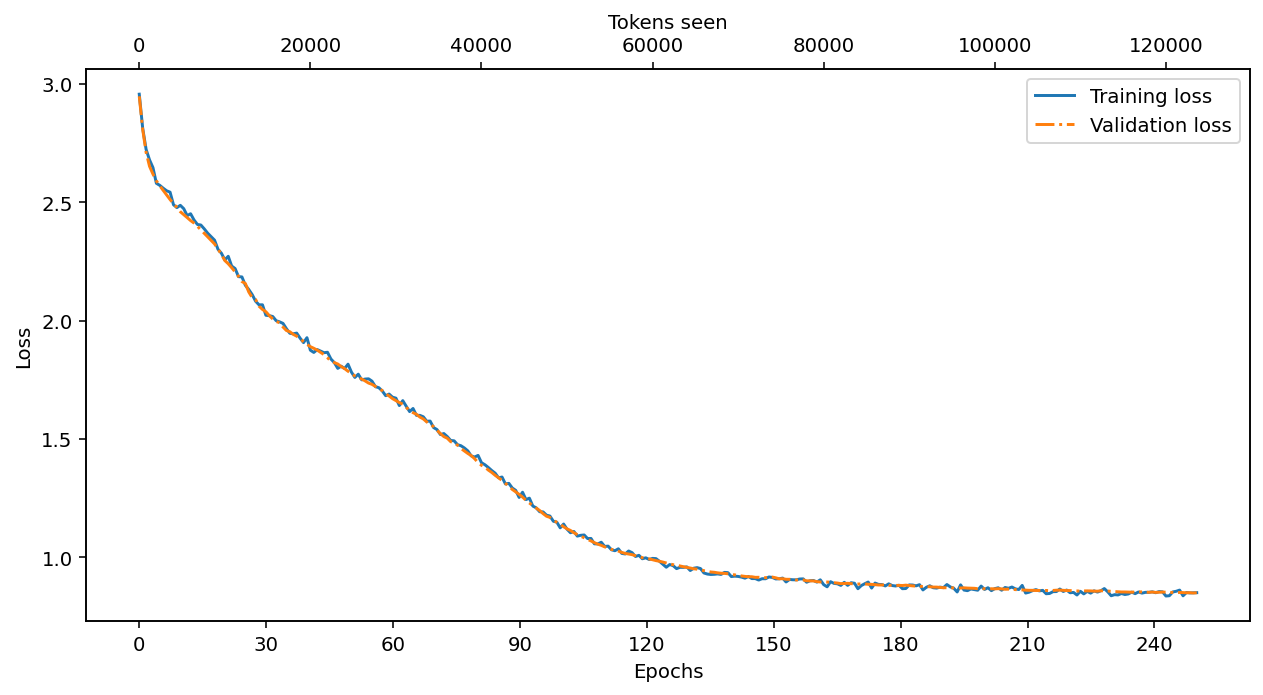

In [14]:
epochs_tensor = torch.linspace(0, num_epochs, len(train_losses))
plot_losses(epochs_tensor, tokens_seen, train_losses, validation_losses)

In [15]:
model.token_embeddings.weight

Parameter containing:
tensor([[-0.0128,  0.2678, -0.3767, -0.6032],
        [ 0.1875,  0.3553, -0.1182, -0.2040],
        [-0.0065, -0.1521,  0.5829, -0.1925],
        [-0.0182,  0.0431,  0.6529,  0.8028],
        [-0.3698, -0.2116,  0.0437,  0.8596],
        [ 0.3416,  0.2302,  0.8963,  0.3558],
        [ 0.8948, -1.6806,  0.2149, -0.5544],
        [-1.3456,  0.3345,  0.1512, -1.0498],
        [-1.1447,  1.0660, -0.6727,  0.2717],
        [ 0.5241, -0.8446, -0.3706, -0.5484],
        [ 1.0075, -0.0201,  0.1960,  0.1380],
        [ 0.9937, -0.9415,  0.0119, -0.0626],
        [-0.6467,  0.7622,  0.2826, -0.4859],
        [-0.8507,  0.1934, -0.0396, -0.9153],
        [ 0.9206,  0.6373, -1.5406, -0.0924]], device='cuda:0',
       requires_grad=True)